In [1]:
print("Hello world")

Hello world


# Libraries

In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore")
import re

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.manifold import TSNE

In [3]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(context = 'talk',  
              style = 'darkgrid',  
              font = 'Malgun Gothic', 
              font_scale = 1.2,         
              rc = custom_params) 

# Read the Data

In [4]:
cur_dir = os.getcwd()

print(cur_dir)
for roots, dirs, files in os.walk(cur_dir):
    if '.git' not in roots:
        print(roots, files)

c:\Users\user\Documents\ML
c:\Users\user\Documents\ML ['.gitignore', 'Company_Rating.ipynb', 'graph.txt', 'Heart_Disease.ipynb', 'Mv_txt.ipynb', 'pre.txt', '분석기법별 특징.png']
c:\Users\user\Documents\ML\.vscode ['settings.json']
c:\Users\user\Documents\ML\data ['bestsellers with categories.csv', 'Book_description.npy', 'Companies_Dataset.csv', 'Companies_Dataset.xlsx', 'heart_disease_uci.csv', 'insurance.csv']


In [5]:
data_list = os.listdir(cur_dir + "\data")
Dataset = {}

for data in data_list:
    if '.csv' in data:
        Dataset[data[:-4]] = pd.read_csv(cur_dir + f"\data\{data}")

In [7]:
insu = Dataset['insurance']
df = insu.copy()

In [8]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Data info

## info

In [22]:
print(f"Shape\n\nIndex: {df.shape[0]}\nColumn: {df.shape[1]}")

Shape

Index: 1337
Column: 7


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## duplicate

In [16]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
df[df.charges == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
df.drop_duplicates(inplace = True)

## null

In [19]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> clean :)

# EDA

## Numeric

In [25]:
df_num = df.select_dtypes(include = "number")
df_num.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


In [30]:
for col in df_num.columns:    
    fig = px.histogram(data_frame = df_num[col],
                       marginal = 'box',
                       nbins = df_num[col].nunique(),
                       color = df['sex'])
    
    fig.update_layout(title = col, bargap = 0.1)
    fig.show()

In [33]:
for col in df_num.columns:    
    fig = px.histogram(data_frame = df_num[col],
                       marginal = 'box',
                       nbins = df_num[col].nunique(),
                       color = df['smoker'])
    
    fig.update_layout(title = col, bargap = 0.1)
    fig.show()

In [46]:
px.scatter(x = df['charges'], y = df['age'], symbol = df['smoker'], color = df['sex'], marginal_x = 'histogram', marginal_y = 'rug', trendline = 'ols')

<Axes: >

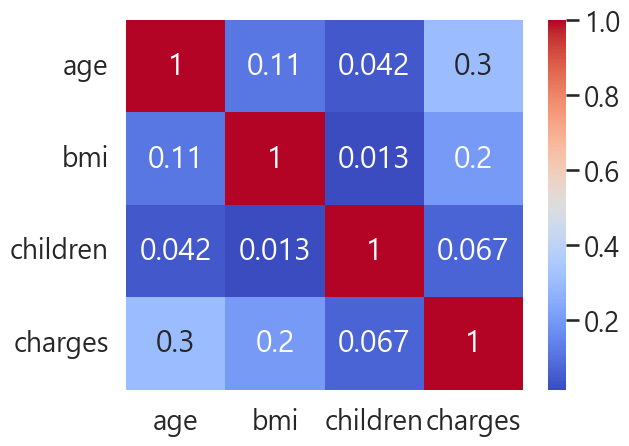

In [48]:
sns.heatmap(df_num.corr(), cmap = "coolwarm", annot = True)

## Categoric

In [39]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head(2)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast


In [41]:
for col in df_cat.columns:    
    print(df_cat[col].value_counts())

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [45]:
for col in df_cat.columns:
    fig = px.histogram(df_cat[col],
                       marginal = 'rug',
                       color_discrete_sequence = ['#3F72AF'])
    fig.update_layout(title = col)
    fig.show()    

## Columns 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'

In [51]:
df.age.value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64